# House Prices - Advanced Regression Techniques
This notebook is a solution to the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition. The goal of the competition is to predict the final price of each home given a set of features. The metric used to evaluate the model is the Root Mean Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Data


In [1]:
%pip install kaggle
%pip install numpy
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Kaggle Data

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
data_dir = './data'
!chmod 600 kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques -p {data_dir}
!unzip -o {data_dir}/house-prices-advanced-regression-techniques.zip -d {data_dir}

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./data/house-prices-advanced-regression-techniques.zip
  inflating: ./data/data_description.txt  
  inflating: ./data/sample_submission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


### Data Description

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(f'{data_dir}/train.csv')
data.head()

/tmp/ipykernel_17926/4291222057.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Cleaning and Preprocessing

In [4]:
data.drop(columns=['Id', 'Utilities'], inplace=True)

In [5]:
def scale_features(col):
    if col.dtype == 'int64' or col.dtype == 'float64':
        mean = col.mean()
        std = col.std()
        return (col - mean) / std
    return col

In [6]:
def clean_features(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col], categories = pd.factorize(df[col])
        df[col] = scale_features(df[col])
    return df.fillna(0)

In [7]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
feattures = train.drop('SalePrice', axis=1)
labels = train['SalePrice']

In [9]:
feattures = clean_features(feattures)
feattures.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,-0.866393,-0.450398,-0.013811,-0.212805,-0.058596,-0.247734,-0.713497,-0.290611,-0.561379,-0.221616,...,-0.27572,-0.070962,-0.066474,-0.429362,-0.198189,-0.092701,-0.133360,1.649359,-0.279051,-0.408013
1066,0.074078,-0.450398,-0.455631,-0.265131,-0.058596,-0.247734,0.980333,-0.290611,-0.561379,-0.221616,...,-0.27572,-0.070962,-0.066474,-0.429362,-0.198189,-0.092701,-0.507792,0.893295,-0.279051,-0.408013
638,-0.631275,-0.450398,-0.134307,-0.177765,-0.058596,-0.247734,-0.713497,-0.290611,-0.561379,-0.221616,...,-0.27572,-0.070962,-0.066474,0.805847,-0.198189,-0.092701,-0.507792,0.137231,-0.279051,-0.408013
799,-0.161040,-0.450398,-0.415465,-0.324335,-0.058596,-0.247734,-0.713497,-0.290611,0.711807,-0.221616,...,-0.27572,-0.070962,-0.066474,0.805847,-0.198189,-0.092701,-0.133360,-0.618833,-0.279051,-0.408013
380,-0.161040,-0.450398,-0.817120,-0.528808,-0.058596,2.204413,-0.713497,-0.290611,-0.561379,-0.221616,...,-0.27572,-0.070962,-0.066474,-0.429362,-0.198189,-0.092701,-0.507792,1.649359,-0.279051,-0.408013


### Visualization

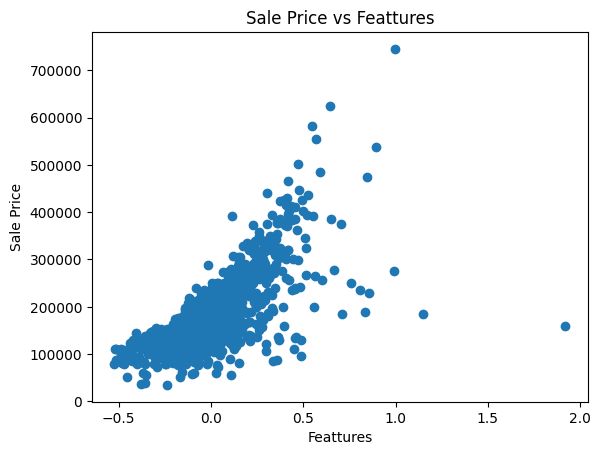

In [10]:
avg_feattures = pd.Series(feattures.loc[:, feattures.columns != 'Id'].mean(axis=1))
plt.scatter(avg_feattures, labels)
plt.xlabel('Feattures')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Feattures')
plt.show()

## Model

In [107]:
from estimator import scratch_model

params = scratch_model.ModelParams(
    weights = np.zeros(feattures.shape[1]),
    bias = 0.0,
    features = feattures.values,
    labels = labels.values,
)
model = scratch_model.PriceEstimator(params)
history = model.train(70, 0.206)

Epoch: 0, Cost: 1.777694907941848e+16
Epoch: 1, Cost: 1.22323808932533e+16
Epoch: 2, Cost: 8672124444906222.0
Epoch: 3, Cost: 6364624951812958.0
Epoch: 4, Cost: 4851203837760742.0
Epoch: 5, Cost: 3843121515817241.0
Epoch: 6, Cost: 3158218892872242.0
Epoch: 7, Cost: 2681352358789928.5
Epoch: 8, Cost: 2339584776369114.0
Epoch: 9, Cost: 2086593192588761.5
Epoch: 10, Cost: 1892855122832721.8
Epoch: 11, Cost: 1739465866045742.0
Epoch: 12, Cost: 1614240539431587.0
Epoch: 13, Cost: 1509254972412915.5
Epoch: 14, Cost: 1419293307303270.8
Epoch: 15, Cost: 1340867229444935.5
Epoch: 16, Cost: 1271595721447431.2
Epoch: 17, Cost: 1209812288234955.8
Epoch: 18, Cost: 1154315768133616.0
Epoch: 19, Cost: 1104211830360632.0
Epoch: 20, Cost: 1058811790812466.2
Epoch: 21, Cost: 1017567692347651.5
Epoch: 22, Cost: 980030361097347.5
Epoch: 23, Cost: 945822047959903.2
Epoch: 24, Cost: 914618353950815.5
Epoch: 25, Cost: 886136087425215.1
Epoch: 26, Cost: 860124931470265.8
Epoch: 27, Cost: 836361576494892.2
Epo

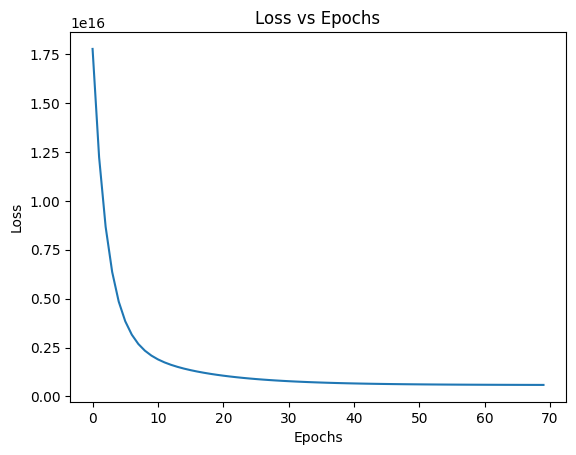

In [108]:
plt.plot(history) 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Validation


In [13]:
valid_features = valid.drop('SalePrice', axis=1)
valid_labels = valid['SalePrice']
valid_features = clean_features(valid_features)

In [109]:
row = valid.shape[0]

for i in range(row):
    print(f"Predicted: {model.predict(valid_features.iloc[i].values)} Actual: {valid_labels.iloc[i]}")

Predicted: 133615.31186755927 Actual: 154500
Predicted: 293372.72773242585 Actual: 325000
Predicted: 110121.05013355518 Actual: 115000
Predicted: 165798.37327076934 Actual: 159000
Predicted: 264457.9059372338 Actual: 315500
Predicted: 76599.0097092692 Actual: 75500
Predicted: 238324.00403096247 Actual: 311500
Predicted: 156142.39156355924 Actual: 146000
Predicted: 70098.1033618944 Actual: 84500
Predicted: 158243.12287520792 Actual: 135500
Predicted: 151366.64144638742 Actual: 145000
Predicted: 117972.55499472347 Actual: 130000
Predicted: 95487.47457898816 Actual: 81000
Predicted: 216357.74318163982 Actual: 214000
Predicted: 194647.62580566542 Actual: 181000
Predicted: 151297.83264481666 Actual: 134500
Predicted: 223154.26196648338 Actual: 183500
Predicted: 144040.51437314317 Actual: 135000
Predicted: 121574.59467413244 Actual: 118400
Predicted: 241688.576979221 Actual: 226000
Predicted: 154704.64587612005 Actual: 155000
Predicted: 217836.92636024384 Actual: 210000
Predicted: 208828.960

## Submission

In [120]:
test = pd.read_csv(f'{data_dir}/test.csv')
clean_test = clean_features(test)
clean_test.drop(columns=['Id', 'Utilities'], inplace=True)
clean_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.874411,-2.038971,0.510333,0.363804,-0.064238,-0.269462,-0.702768,-0.305338,-0.494332,-0.207921,...,1.818336,-0.057207,-0.042776,0.919334,-0.187847,-0.092212,-0.038268,1.713318,-0.320112,-0.393068
1,-0.874411,-0.453225,0.555022,0.897553,-0.064238,-0.269462,1.089783,-0.305338,0.688013,-0.207921,...,-0.301440,-0.057207,-0.042776,-0.434156,2.525699,19.723675,-0.038268,1.713318,-0.320112,-0.393068
2,0.061330,-0.453225,0.242199,0.809368,-0.064238,-0.269462,1.089783,-0.305338,-0.494332,-0.207921,...,-0.301440,-0.057207,-0.042776,0.919334,-0.187847,-0.092212,-1.140224,1.713318,-0.320112,-0.393068
3,0.061330,-0.453225,0.420955,0.032053,-0.064238,-0.269462,1.089783,-0.305338,-0.494332,-0.207921,...,-0.301440,-0.057207,-0.042776,-0.434156,-0.187847,-0.092212,-0.038268,1.713318,-0.320112,-0.393068
4,1.464941,-0.453225,-1.143162,-0.971475,-0.064238,-0.269462,1.089783,1.476613,-0.494332,-0.207921,...,2.242291,-0.057207,-0.042776,-0.434156,-0.187847,-0.092212,-1.874861,1.713318,-0.320112,-0.393068


In [121]:
submission = pd.read_csv(f'{data_dir}/sample_submission.csv')
for i in range(test.shape[0]):
    submission['SalePrice'][i] = model.predict(clean_test.iloc[i].values)
submission.head()

/tmp/ipykernel_17926/2345241818.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submission['SalePrice'][i] = model.predict(clean_test.iloc[i].values)
/tmp/ipykernel_17926/2345241818.py:3: SettingWithCopyWarning: 
A value is trying to be 

,Id,SalePrice
0,1461,120089.065489
1,1462,166738.964355
2,1463,170709.051969
3,1464,182277.213019
4,1465,184930.689159


In [122]:
submission.to_csv(f'{data_dir}/submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {data_dir}/submission.csv -m "Message"